## Mount to gdrive to read data, adjacency matrix, p_link and labels. 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Install pandas to read csv files from gdrive. Install torch and numpy which are packages that are needed durind coding.

In [ ]:
!pip install pandas
import pandas as pd
import torch
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load data which are processed in preprocessing_data_4classdes.ipynb file.

In [ ]:
path = F"/gdrive/MyDrive/4classes.sim/data.pt"
Data = torch.load(path)
Data

{'x': tensor([[-0.4530,  0.5955, -1.1069,  ...,  0.5985,  0.1790,  0.2985],
         [ 0.2027,  0.6537,  0.6290,  ..., -0.1876, -1.2782,  0.5982],
         [-0.2713,  0.4418,  1.5845,  ..., -1.1430, -2.2012,  0.7388],
         ...,
         [ 0.5176, -1.6871, -1.4386,  ..., -0.2084,  1.3068, -0.1615],
         [ 0.0700, -1.4413, -0.2656,  ..., -0.3264,  1.0155,  0.4870],
         [-0.2865,  1.4095,  1.7289,  ..., -0.3547, -1.7226,  0.7805]]),
 'edge_index': tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  2,  4,  4,  4,  4,  5,  5,  6,  6,  6,
           6,  6,  6,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
          11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
          14, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 21,
          21, 21, 22, 23, 24, 24, 24, 24, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26,
          27, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 32, 32,
          33, 34, 34, 34, 34, 34, 34, 35, 36, 3

# Gather some statistics about the graph.

In [ ]:
print(f'Number of nodes: {Data["x"].size(0)}')
print(f'Number of features: {Data["x"].size(1)}')
print(f'Number of classes: {torch.numel(torch.unique(Data["y"],sorted=True))}')
print(f'Number of edges: {Data["edge_index"].size(1)}')
print(f'Average node degree: {Data["edge_index"].size(1) / Data["x"].size(0):.2f}')
print(f'Number of training nodes: {Data["train_mask"].sum()}')
print(f'Number of testing nodes: {Data["test_mask"].sum()}')
print(f'Training node label rate: {int(Data["train_mask"].sum()) /  Data["x"].size(0):.2f}')

Number of nodes: 40
Number of features: 500
Number of classes: 4
Number of edges: 126
Average node degree: 3.15
Number of training nodes: 8
Number of testing nodes: 22
Training node label rate: 0.20


# Install torch_geometic

In [ ]:
import os
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.13.0+cu116
     |████████████████████████████████| 9.4 MB 30.6 MB/s 
     |████████████████████████████████| 4.6 MB 25.3 MB/s 
     |████████████████████████████████| 280 kB 16.1 MB/s 


In [ ]:
from torch_geometric.nn import MessagePassing
import torch_geometric.nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Creating message passing network.

In [ ]:
class Myconv(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(2)
        self.conv1 = GATConv(in_channels = 500, out_channels = 8)
        self.conv2 =  GATConv(8, 4)
        
    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.torch.tanh(h)
        h = self.conv2(h, edge_index)
        h = F.log_softmax(h)
        return h
        
model = Myconv()
print(model)
print(model.forward(Data["x"], Data["edge_index"]))

Myconv(
  (conv1): GATConv(500, 8, heads=1)
  (conv2): GATConv(8, 4, heads=1)
)
tensor([[-1.4782, -3.2267, -1.6484, -0.6164],
        [-2.0163, -2.9077, -1.6430, -0.4799],
        [-0.9537, -1.8489, -2.1233, -1.0858],
        [-2.5058, -2.3223, -0.3816, -1.9836],
        [-1.0091, -2.2511, -1.4071, -1.2542],
        [-1.2715, -1.9648, -2.0565, -0.7952],
        [-0.9781, -2.0685, -1.6489, -1.1863],
        [-1.2810, -0.7253, -2.0576, -2.2048],
        [-0.9781, -2.0685, -1.6489, -1.1863],
        [-1.0504, -2.1256, -1.5886, -1.1190],
        [-1.4075, -1.5120, -1.7793, -1.0051],
        [-1.8909, -2.5580, -1.5674, -0.5744],
        [-0.4946, -1.8777, -2.1263, -2.1373],
        [-1.4524, -2.7654, -1.5383, -0.7168],
        [-1.1531, -2.7234, -1.3636, -1.0135],
        [-1.4762, -1.8212, -1.0878, -1.2994],
        [-1.2769, -2.0969, -2.1223, -0.7371],
        [-1.4118, -3.4797, -1.4304, -0.7210],
        [-2.0807, -2.8264, -1.6534, -0.4707],
        [-1.5796, -2.4318, -1.4956, -0.7299],


<ipython-input-7-5f86d3f84677>:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.log_softmax(h)


# We take a look at the node embeddings produced by GAT (before training).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(z[:, 0], z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",4)).set(title = "First scenario data T-SNE projection before training (GAT)")

<ipython-input-7-5f86d3f84677>:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.log_softmax(h)
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Embedding shape: [40, 4]


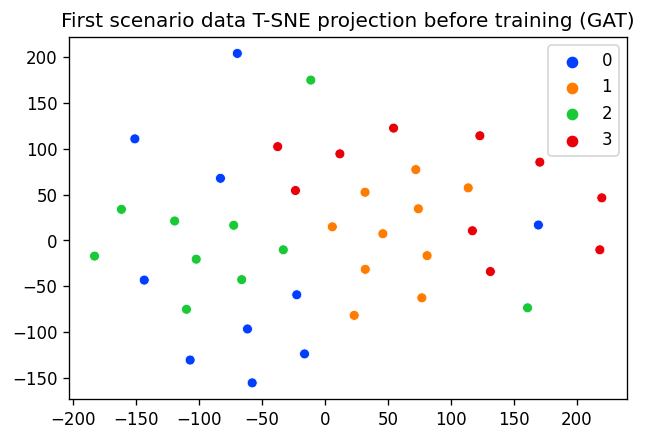

In [ ]:
model = Myconv()
h = model(Data["x"], Data["edge_index"])

print(f'Embedding shape: {list(h.shape)}')
visualize(h)

# Start training the model. 

In [ ]:
model = Myconv()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(),  lr = 0.0005)  # Define optimizer, an object for updating parameters
#loss = loss + weight decay parameter * L2 norm of the weights, 1) To prevent overfitting 2) To keep the weights small and avoid exploding gradient

def train(Data):
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(Data["x"], Data["edge_index"])
    train_loss = criterion(out[Data["train_mask"]], Data["y"][Data["train_mask"]])  # Compute the loss solely based on the training nodes.
    train_loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return train_loss


def val(Data):
      model.eval()
      with torch.no_grad():
        out = model(Data["x"], Data["edge_index"])
        val_loss = criterion(out[Data["val_mask"]], Data["y"][Data["val_mask"]])
        #pred = out.argmax(dim=1)
        #test_correct = pred[Data["val_mask"]] == Data["y"][Data["val_mask"]]  # Check against ground-truth labels.
        #test_acc = int(test_correct.sum()) / int(Data["val_mask"].sum())  # Derive ratio of correct predictions.
        return val_loss

In [ ]:
train_loss_ = []
val_loss_ = []

for epoch in range(1, 201):

  epoch_train_loss = []
  epoch_val_loss = []
  train_loss = train(Data)
  val_loss = val(Data)






  epoch_train_loss.append(train_loss.item())
  epoch_val_loss.append(val_loss.item())




  

  val_loss_.append(sum(epoch_val_loss)/len(epoch_val_loss))
  train_loss_.append(sum(epoch_train_loss)/len(epoch_train_loss))
  print(epoch,'Train Loss: %.3f | val Loss: %.3f'%( train_loss,val_loss))

<ipython-input-7-5f86d3f84677>:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.log_softmax(h)


1 Train Loss: 1.686 | val Loss: 1.777
2 Train Loss: 1.583 | val Loss: 1.714
3 Train Loss: 1.483 | val Loss: 1.656
4 Train Loss: 1.389 | val Loss: 1.605
5 Train Loss: 1.304 | val Loss: 1.564
6 Train Loss: 1.229 | val Loss: 1.529
7 Train Loss: 1.158 | val Loss: 1.496
8 Train Loss: 1.088 | val Loss: 1.465
9 Train Loss: 1.023 | val Loss: 1.435
10 Train Loss: 0.961 | val Loss: 1.406
11 Train Loss: 0.902 | val Loss: 1.379
12 Train Loss: 0.846 | val Loss: 1.354
13 Train Loss: 0.793 | val Loss: 1.330
14 Train Loss: 0.745 | val Loss: 1.309
15 Train Loss: 0.700 | val Loss: 1.290
16 Train Loss: 0.658 | val Loss: 1.273
17 Train Loss: 0.620 | val Loss: 1.256
18 Train Loss: 0.584 | val Loss: 1.241
19 Train Loss: 0.551 | val Loss: 1.226
20 Train Loss: 0.521 | val Loss: 1.213
21 Train Loss: 0.492 | val Loss: 1.200
22 Train Loss: 0.466 | val Loss: 1.188
23 Train Loss: 0.442 | val Loss: 1.177
24 Train Loss: 0.419 | val Loss: 1.168
25 Train Loss: 0.399 | val Loss: 1.161
26 Train Loss: 0.380 | val Loss: 1

# Visualize train loss and val loss.

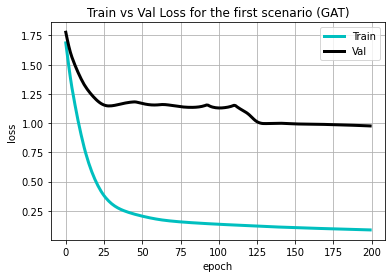

In [ ]:
plt.plot(train_loss_, "c", linewidth = 3)
plt.plot(val_loss_, "k", linewidth = 3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.title('Train vs Val Loss for the first scenario (GAT)')
plt.grid()
plt.show()

# Compute the accuracy of the model.

In [ ]:
def test(Data):
      model.eval()
      with torch.no_grad():
        out = model(Data["x"], Data["edge_index"])
        pred = out.argmax(dim = 1)
        test_correct = pred[Data["test_mask"]] == Data["y"][Data["test_mask"]]  # Check against ground-truth labels.
        test_acc = int(test_correct.sum()) / int(Data["test_mask"].sum())  # Derive ratio of correct predictions.
        return test_acc

In [ ]:
test_acc = test(Data)
print(f'Test Accuracy: {100*test_acc:.2f}')

Test Accuracy: 86.36


<ipython-input-7-5f86d3f84677>:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.log_softmax(h)


# We take a look at the node embeddings produced by GAT (after training).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(z[:, 0], z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",4)).set(title = "First scenario data T-SNE projection after training (GAT)")

<ipython-input-7-5f86d3f84677>:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.log_softmax(h)
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


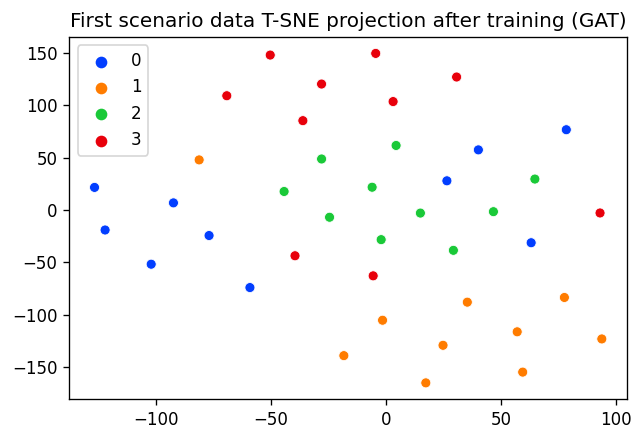

In [ ]:
model.eval()
out = model(Data["x"], Data["edge_index"])
visualize(out)


# Confusion matrix.

In [ ]:
pred = out.argmax(dim=1)
pred

tensor([0, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 0, 2, 2, 0, 1, 0, 3,
        1, 3, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0])

In [ ]:
pred = pred[Data["test_mask"]] 

In [ ]:
act = Data["y"][Data["test_mask"]]

In [ ]:
data = {'y_Actual':    act,
        'y_Predicted': pred
        }

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])
df

,y_Actual,y_Predicted
0,2,2
1,3,3
2,0,2
3,1,1
4,1,1
5,3,3
6,0,0
7,3,3
8,0,0
9,2,2


<ipython-input-21-62f68310b0c2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


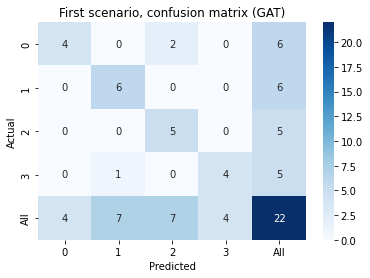

In [ ]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames = ['Predicted'], margins = True)
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,  cmap="Blues")
ax = plt.axes()
ax.set_title('First scenario, confusion matrix (GAT)')
plt.show()